In [20]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, plot_model
from keras import backend as K
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
import random
random.seed(0)

import warnings
warnings.filterwarnings('ignore')

In [21]:
from keras.datasets import fashion_mnist
(x_train, y_train),(x_test,y_test)=fashion_mnist.load_data()

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [23]:
classes=np.unique(y_train)
nclasses=len(classes)
print('Unique Classes:',nclasses)
print('Classes:',classes)

Unique Classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Truth:0')

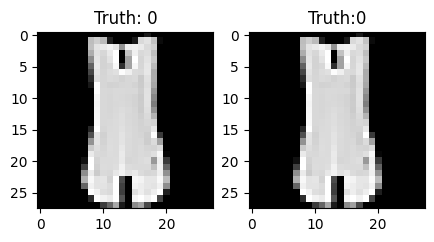

In [24]:
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow(x_train[4,:,:],cmap='gray')
plt.title('Truth: {}'.format(y_train[4]))

plt.subplot(122)
plt.imshow(x_train[4,:,:],cmap='gray')
plt.title('Truth:{}'.format(y_train[4]))

In [25]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [26]:
# now we want to normalize our data so that it should be in range from 0 and 1
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [27]:
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

print('Original Label',y_train[0])
print('One value of y_train',y_train_one_hot[0])

Original Label 9
One value of y_train [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train_one_hot,test_size=0.3,random_state=42)

In [29]:
batch_size=64
epochs=5
num_classes=10


In [30]:

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28, 28, 1), padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))  # Correct usage
fashion_model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))  # Correct usage
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='relu'))
fashion_model.add(Dropout(0.5))
fashion_model.add(Dense(10, activation='softmax'))

# Print model summary to check the architecture
fashion_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                 

In [31]:
fashion_model.add(Dense(128,activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes,activation='softmax'))

In [32]:
fashion_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
H=fashion_model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val,y_val))

Epoch 1/5
657/657 [==============================] - 70s 100ms/step - loss: 1.2508 - accuracy: 0.4485 - val_loss: 0.8161 - val_accuracy: 0.5911
Epoch 2/5
657/657 [==============================] - 61s 93ms/step - loss: 0.6031 - accuracy: 0.7515 - val_loss: 0.4312 - val_accuracy: 0.8459
Epoch 3/5
657/657 [==============================] - 62s 94ms/step - loss: 0.4024 - accuracy: 0.8598 - val_loss: 0.3314 - val_accuracy: 0.8856
Epoch 4/5
657/657 [==============================] - 61s 93ms/step - loss: 0.3381 - accuracy: 0.8829 - val_loss: 0.3012 - val_accuracy: 0.8974
Epoch 5/5
657/657 [==============================] - 65s 99ms/step - loss: 0.3050 - accuracy: 0.8940 - val_loss: 0.2768 - val_accuracy: 0.9029


In [36]:
test_loss, test_acc = fashion_model.evaluate(x_test, y_test_one_hot, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 4s - loss: 0.3001 - accuracy: 0.8959 - 4s/epoch - 13ms/step

Test accuracy: 0.8959000110626221


In [37]:
train_loss,train_acc=fashion_model.evaluate(x_test,y_test_one_hot,verbose=2)
print('Training Accuracy:',train_acc)

313/313 - 4s - loss: 0.3001 - accuracy: 0.8959 - 4s/epoch - 11ms/step
Training Accuracy: 0.8959000110626221


NameError: name 'fashion' is not defined

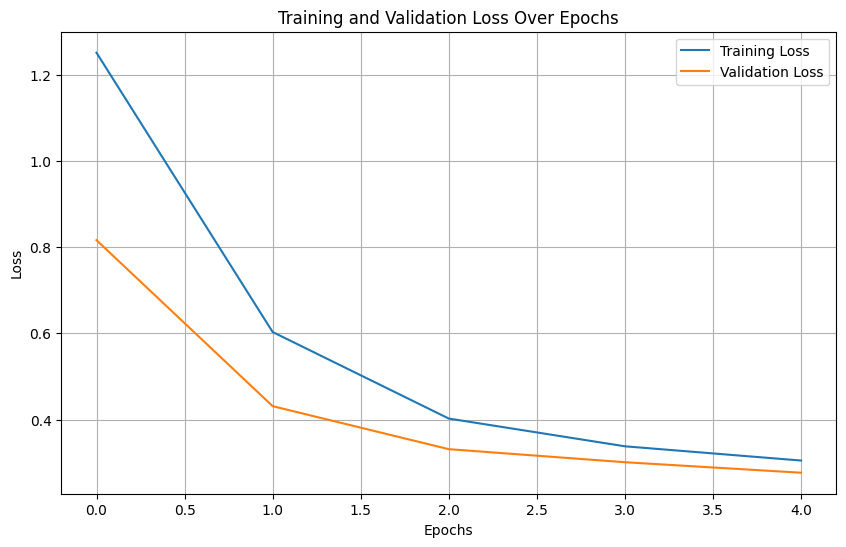

In [40]:
h = H.history

# Plot the training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

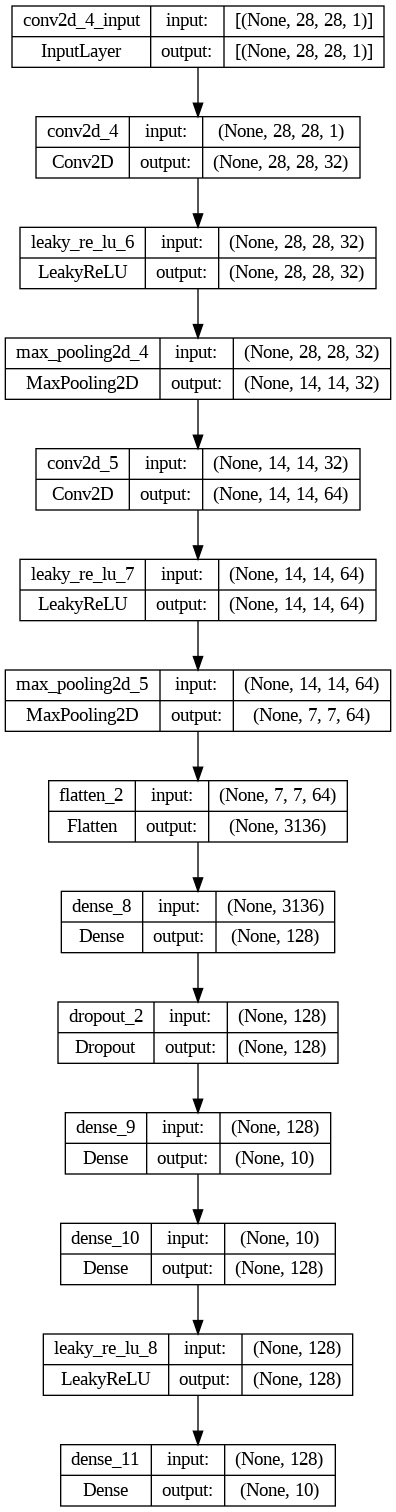

In [41]:
plot_model(fashion_model,to_file='fashion_model.png',show_shapes=True,show_layer_names=True)

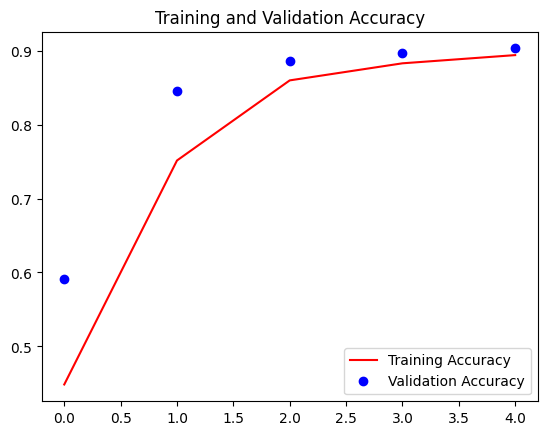

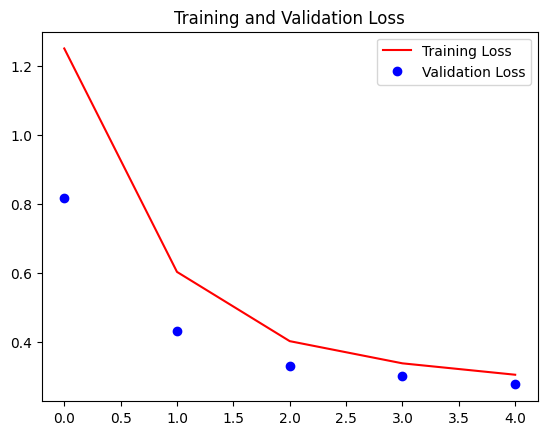

In [50]:
accuracy=h['accuracy']
val_accuracy=h['val_accuracy']
loss=h['loss']
val_loss=h['val_loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'r',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'bo',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'bo',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()